<a href="https://colab.research.google.com/github/dickyoktavian1010-dot/pengolahan-citra/blob/main/tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving imgae_w_noise.jpg to imgae_w_noise.jpg


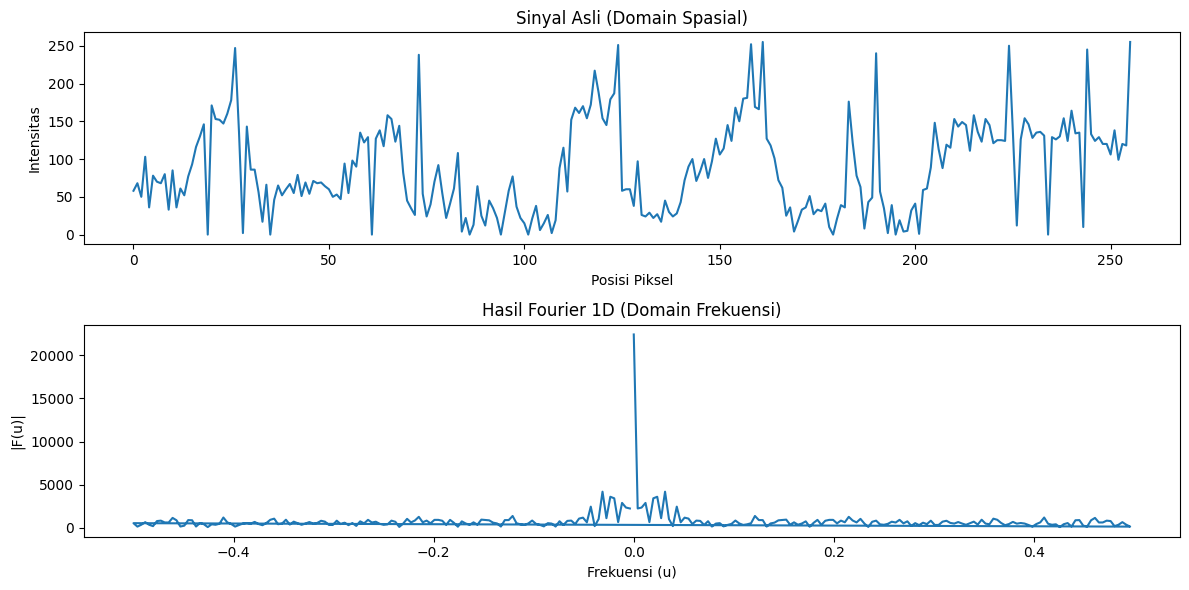

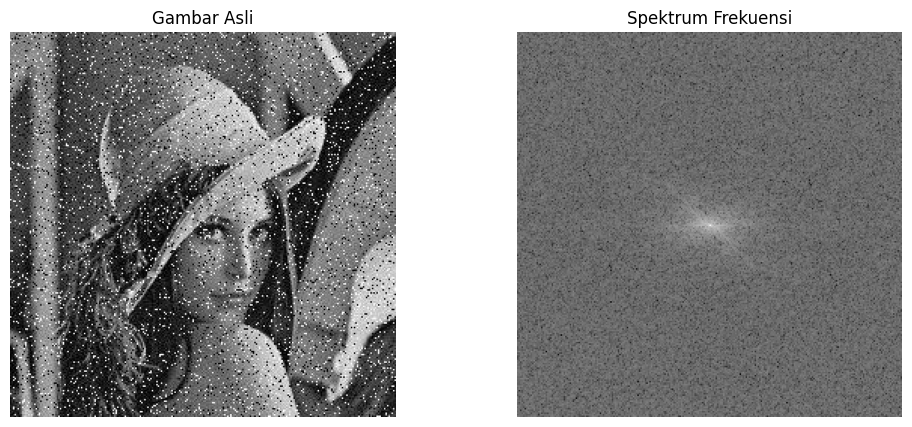

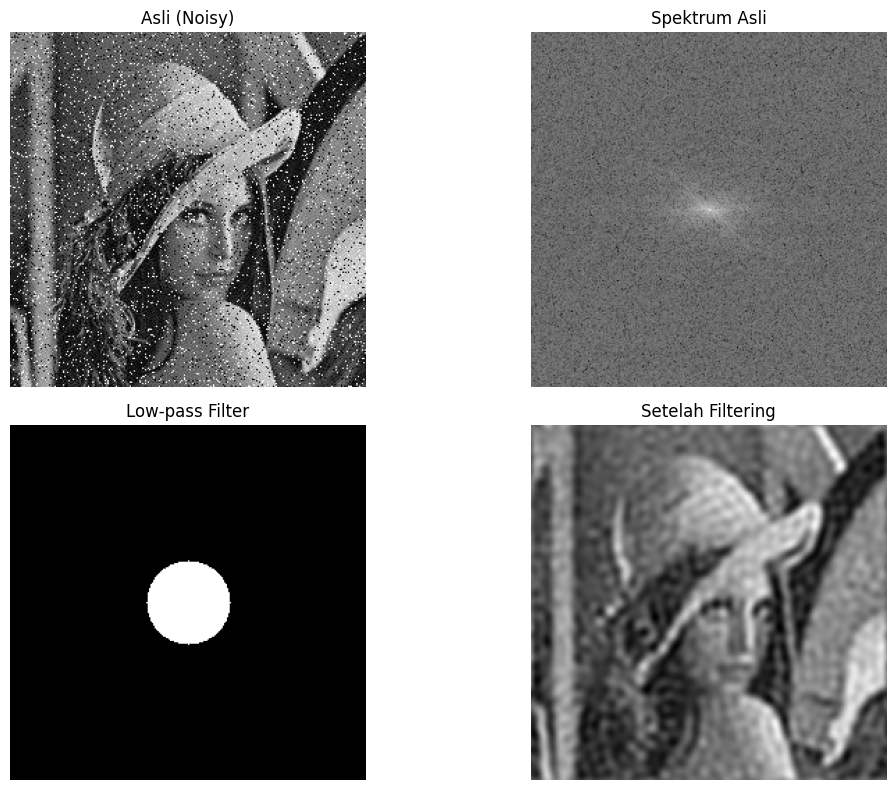

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar grayscale
img = cv2.imread('imgae_w_noise.jpg', cv2.IMREAD_GRAYSCALE)

# Pastikan tidak None
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan, pastikan nama file benar!")

# --------------------------------------------------
# NOMOR 1: Fourier 1D
row_signal = img[img.shape[0] // 2, :]
F = np.fft.fft(row_signal)
freq = np.fft.fftfreq(len(F))

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(row_signal)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, np.abs(F))
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# NOMOR 2: Fourier 2D
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift)+1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spektrum Frekuensi')
plt.axis('off')
plt.show()

# --------------------------------------------------
# NOMOR 3: Hilangkan noise (Low-pass filter)
rows, cols = img.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols), np.uint8)
r = 30
cv2.circle(mask, (ccol, crow), r, 1, -1)

fshift_filtered = fshift * mask
img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
img_filtered = np.abs(img_filtered)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray'); plt.title('Asli (Noisy)'); plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(np.log(1+np.abs(fshift)), cmap='gray'); plt.title('Spektrum Asli'); plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(mask, cmap='gray'); plt.title('Low-pass Filter'); plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(img_filtered, cmap='gray'); plt.title('Setelah Filtering'); plt.axis('off')
plt.tight_layout()
plt.show()